In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [213]:
trainDataset = pd.read_csv("drugsComTrain_raw.tsv", sep = '\t')
testDataset = pd.read_csv("drugsComTest_raw.tsv", sep = '\t')

print('trainDataset size' , trainDataset.shape)
print('testDataset size' , testDataset.shape)

trainDataset size (161297, 7)
testDataset size (53766, 7)


In [214]:
data = pd.concat([trainDataset, testDataset])
print('Final concatenated Dataset ', data.shape)
data.head()


Final concatenated Dataset  (215063, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [215]:
data.columns = ['Id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']
data.head()

,Id,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [216]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()
data.shape

(213869, 7)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213869 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           213869 non-null  int64  
 1   drugName     213869 non-null  object 
 2   condition    213869 non-null  object 
 3   review       213869 non-null  object 
 4   rating       213869 non-null  float64
 5   date         213869 non-null  object 
 6   usefulCount  213869 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [218]:
data['Id'].nunique()

213869

In [219]:
data['review'][1]

1    "My son is halfway through his fourth week of ...
1    "My son has Crohn&#039;s disease and has done ...
Name: review, dtype: object

In [221]:
data['rating'].value_counts()

rating
10.0    67682
9.0     36499
1.0     28769
8.0     24909
7.0     12470
5.0     10650
2.0      9203
3.0      8662
6.0      8403
4.0      6622
Name: count, dtype: int64

# Review Counts based on ratings

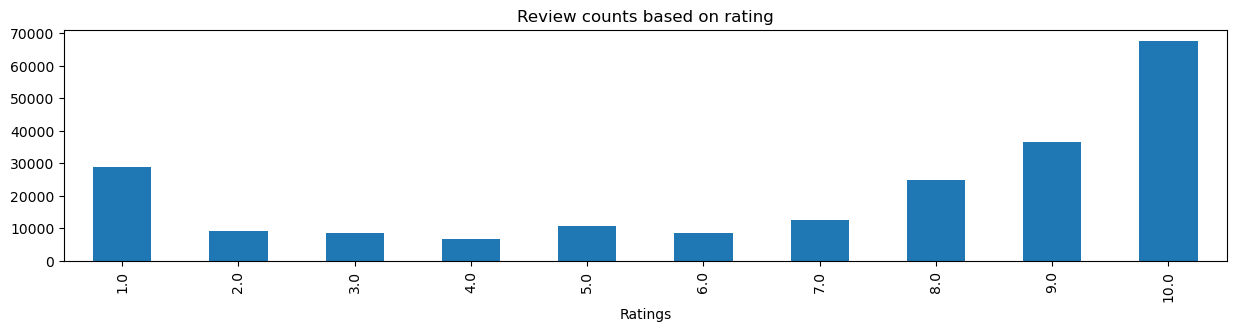

In [222]:
ax = data['rating'].value_counts().sort_index() \
    .plot(
        kind='bar', 
        title="Review counts based on rating",
        figsize=((15, 3))
    )
ax.set_xlabel('Ratings')
plt.show()

In [224]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [225]:
# Stop words using normal looping + TO DO: REMOVE THIS LATER

# for row in data['review']:
#     for item in row.split():
#         if(item not in stopwords):
#             print(item)
#             break

# Removing stopwords from review columns
data['cleanReview'] = data['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

In [192]:
data['cleanReview'][0]

0    "It side effect, I take combination Bystolic 5...
0    "I&#039;ve tried antidepressants years (citalo...
Name: cleanReview, dtype: object

In [226]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply to the DF series
data['cleanReview'] = data['cleanReview'].apply(remove_punctuations)


In [229]:
# Clean Reviews after removing punctuations
data['cleanReview'].head(10)

0    It side effect I take combination Bystolic 5 M...
1    My son halfway fourth week Intuniv We became c...
2    I used take another oral contraceptive 21 pill...
3    This first time using form birth control I039m...
4    Suboxone completely turned life around I feel ...
5    2nd day 5mg started work rock hard erections h...
6    He pulled out cummed bit me I took Plan B 26 h...
7    Abilify changed life There hope I Zoloft Cloni...
8     I Ve nothing problems Keppera  constant shaki...
9    I pill many years When doctor changed RX chate...
Name: cleanReview, dtype: object

# VADER Sentiment Scoring

In [230]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# data = data.head(50000)

In [231]:
data['vaderReviewScore'] = data['cleanReview'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [233]:
data.head()

(213869, 9)

In [206]:
positive_num = len(data[data['vaderReviewScore'] >= 0.05])
negative_num = len(data[(data['vaderReviewScore'] > -0.05) & (data['vaderReviewScore'] < 0.05) ])
neutral_num = len(data[data['vaderReviewScore'] <-0.05])

print(positive_num, negative_num, neutral_num)

24095 2422 23480


In [209]:
data['vaderSentiment'] = data['vaderReviewScore'].map(lambda x: int(2) if x >=0.05  else int(1) if x<=-0.05 else int(0))

In [211]:
Total_vaderSentiment = positive_num + neutral_num + negative_num
Total_vaderSentiment

49997

In [173]:
from tqdm.notebook import tqdm

res = {}

for index, row in tqdm(data.iterrows(), total=len(data)):
    res[index] = sia.polarity_scores(row['review'])

  0%|          | 0/5000 [00:00<?, ?it/s]

In [174]:
vaderResults = pd.DataFrame(res)

vaderResults = vaderResults.T

vaderResults = vaderResults.reset_index().rename(columns={
    'index' : 'Id'
})

# Final Dataset with vader polarity scores
data = data.merge(vaderResults, how='left')

data.head()


,Id,drugName,condition,review,rating,date,usefulCount,cleanReview,neg,neu,pos,compound
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,It side effect I take combination Bystolic 5 M...,NaN,NaN,NaN,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,My son halfway fourth week Intuniv We became c...,NaN,NaN,NaN,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,I used take another oral contraceptive 21 pill...,NaN,NaN,NaN,NaN
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,This first time using form birth control I039m...,NaN,NaN,NaN,NaN
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,Suboxone completely turned life around I feel ...,NaN,NaN,NaN,NaN


In [175]:
# from tqdm.notebook import tqdm

# for i, row in tqdm(data.iterrows(), total=len(data)):
#     reviewText = row['review']
#     vader_sentiments = sia.polarity_scores(reviewText)
    
#     # Vader sentiment polarity
#     data['vader_neg'] = vader_sentiments['neg']
#     data['vader_neu'] = vader_sentiments['neu']
#     data['vader_pos'] = vader_sentiments['pos']
#     data['vader_compound'] = vader_sentiments['compound']

In [176]:
def label_sentiment(compound):
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
data['sentiment'] = data['compound'].apply(label_sentiment)

data


,Id,drugName,condition,review,rating,date,usefulCount,cleanReview,neg,neu,pos,compound,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,It side effect I take combination Bystolic 5 M...,NaN,NaN,NaN,NaN,Neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,My son halfway fourth week Intuniv We became c...,NaN,NaN,NaN,NaN,Neutral
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,I used take another oral contraceptive 21 pill...,NaN,NaN,NaN,NaN,Neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,This first time using form birth control I039m...,NaN,NaN,NaN,NaN,Neutral
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,Suboxone completely turned life around I feel ...,NaN,NaN,NaN,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,112547,Lunesta,Insomnia,"""I&#039;ve suffered with insomnia for many yea...",1.0,"October 12, 2017",0,I039ve suffered insomnia many years Ambien I b...,NaN,NaN,NaN,NaN,Neutral
4996,14245,Myrbetriq,Overactive Bladde,"""The medication does work for me, but the cost...",10.0,"January 16, 2015",46,The medication work me cost hard ship,NaN,NaN,NaN,NaN,Neutral
4997,157502,Emtricitabine / rilpivirine / tenofovir,HIV Infection,"""It&#039;s been almost 2 years since switching...",9.0,"November 24, 2015",6,It039s almost 2 years since switching Atripla ...,NaN,NaN,NaN,NaN,Neutral
4998,16118,Ethinyl estradiol / norethindrone,Birth Control,"""Does a good job at preventing pregnancy... Bu...",7.0,"May 10, 2016",6,Does good job preventing pregnancy But Gained ...,NaN,NaN,NaN,NaN,Neutral


In [177]:
# vader_data = pd.read_csv('vader_sentiments.csv')
# # vader_data.head(20)
# # data.to_csv('vader_sentiments.csv')

postive = len(data(data['compound'] >= 0.05))
negative = len(data(data['compound'] <= 0.05))
negative

TypeError: 'DataFrame' object is not callable

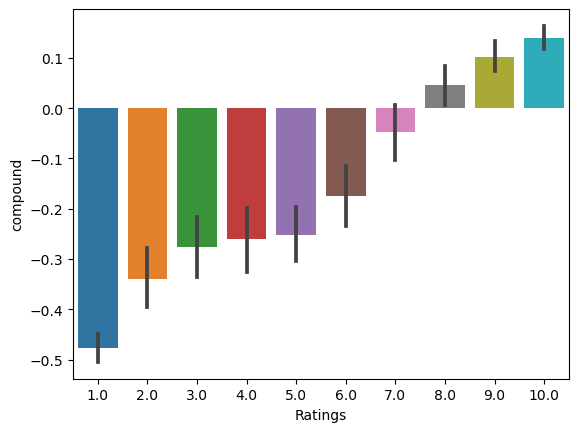

In [ ]:
import seaborn as sns

ax = sns.barplot(data=data, x = 'rating', y = 'compound')
ax.set_xlabel('Ratings')
plt.show()

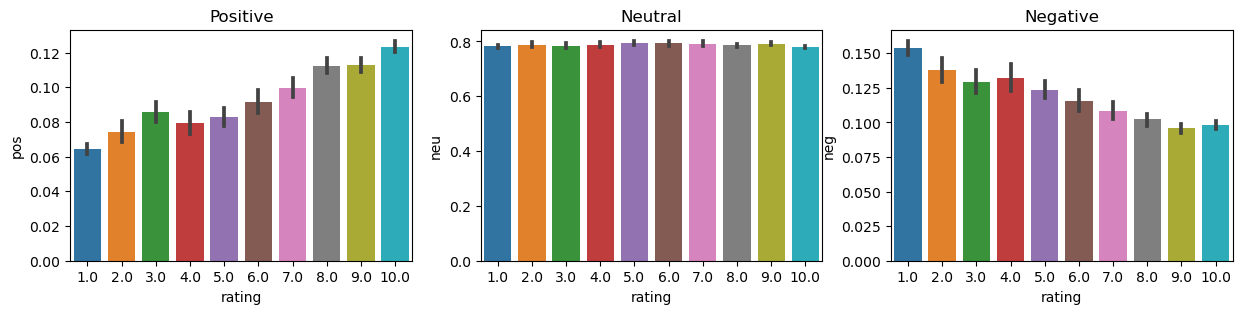

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,3))
sns.barplot(data=data, x = 'rating', y = 'pos', ax=axs[0])
sns.barplot(data=data, x = 'rating', y = 'neu', ax=axs[1])
sns.barplot(data=data, x = 'rating', y = 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [ ]:
# Text Tokenization and Cleaning
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()  # convert to lowercase
    tokens = word_tokenize(text)  # tokenize text
    filtered_tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(filtered_tokens)

data['clean_review'] = data['review'].apply(clean_text)

# Feature Engineering
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['clean_review'])
y = data['sentiment']

0       Negative
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
9995    Negative
9996    Negative
9997    Negative
9998    Negative
9999    Negative
Name: sentiment, Length: 10000, dtype: object

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Sentiment Classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classificati_report(y_test, y_onpred))

Accuracy: 0.825759454432734
Classification Report:


NameError: name 'classificati_report' is not defined

In [ ]:
# Sentiment Analysis
data['predicted_sentiment'] = classifier.predict(tfidf_vectorizer.transform(data['clean_review']))

# Displaying the results
print(data[['review', 'rating', 'sentiment', 'predicted_sentiment']].head(10))

                                              review  rating sentiment  \
0  "It has no side effect, I take it in combinati...     9.0  positive   
1  "My son is halfway through his fourth week of ...     8.0  positive   
2  "I used to take another oral contraceptive, wh...     5.0   neutral   
3  "This is my first time using any form of birth...     8.0  positive   
4  "Suboxone has completely turned my life around...     9.0  positive   
5  "2nd day on 5mg started to work with rock hard...     2.0  negative   
6  "He pulled out, but he cummed a bit in me. I t...     1.0  negative   
7  "Abilify changed my life. There is hope. I was...    10.0  positive   
8  " I Ve had  nothing but problems with the Kepp...     1.0  negative   
9  "I had been on the pill for many years. When m...     8.0  positive   

  predicted_sentiment  
0            positive  
1            positive  
2            positive  
3            positive  
4            positive  
5            positive  
6            nega